## 선형회귀분석을 통해 w,b를 구하시오

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('electric.csv')
df

,Unnamed: 0,전기생산량,전기사용량
0,0,3.52,2.48
1,1,2.58,2.27
2,2,3.31,2.47
3,3,4.07,2.77
4,4,4.62,2.98
5,5,3.98,3.05
6,6,4.29,3.18
7,7,4.83,3.46
8,8,3.71,3.03
9,9,4.61,3.25


In [3]:
# 텐서 객체가 노드이므로 'x = df['전기생산량']'이라고 만들면 안됨, 이건 pandas 객체

x = tf.placeholder(tf.float32)
y = tf.constant(df['전기사용량'], tf.float32)

In [4]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [5]:
y

<tf.Tensor 'Const:0' shape=(12,) dtype=float32>

In [6]:
# w와 b에 초기값을 부여하는 과정

w = tf.Variable( tf.random_uniform([1]))
b = tf.Variable( tf.random_uniform([1]))

In [7]:
# 가설 설정

hx = w*x + b

# 비용함수 설정
cost = tf.reduce_mean(tf.square(hx-y))

In [8]:
# 미분

# 러닝메이트(0.001)는 테스트를 통해 조절
optimizer = tf.train.GradientDescentOptimizer(0.001) # argument로 learning mate를 투입
train = optimizer.minimize( cost )

In [9]:
# init은 랜덤하게 w와 b에 값을 투입시키는 기능

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [10]:
# 학습 시작
hist = []

for i in range(10000) :
    sess.run(train, {x:df['전기생산량']} ) 
#    if i%100==0:
    c = sess.run(cost, {x:df['전기생산량']})
    #print(i, c)
    hist.append(c)

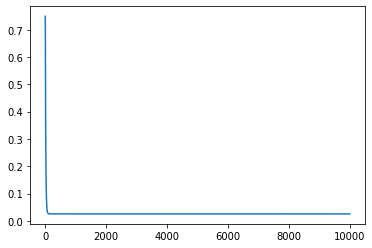

In [11]:
plt.plot(hist)
plt.show()

In [12]:
# 트레이닝 결과

sess.run(w)

array([0.5143779], dtype=float32)

In [13]:
# 트레이닝 결과

sess.run(b)

array([0.8448144], dtype=float32)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51204 missing from c

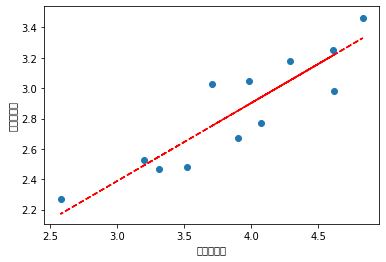

In [14]:
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.scatter(df['전기생산량'], df['전기사용량'])
plt.plot(df['전기생산량'], sess.run(hx,{x:df['전기생산량']} ), 'r--')
plt.show()

## 전기생산량이 40일 때 전기 상용량을 예측하시오

In [15]:
# 전기생산량이 40일때 전기사용량 예측

sess.run(hx, {x:[40]})

array([21.41993], dtype=float32)